# Testing my ICA algorithms

In [1]:
import numpy as np
from scipy.signal import square, sawtooth
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd

%matplotlib inline

from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

In [2]:
x = np.linspace(-10, 10, 1000)
source1 = np.sin(x)
source2 = square(x)
source3 = sawtooth(x)

sources = np.array([source1, source2, source3])

A = np.random.random(size =  (3,3))
mixtures = np.dot(A, sources)
print(A)

[[ 0.9053086   0.22835963  0.06600341]
 [ 0.7106941   0.96770981  0.38807832]
 [ 0.57525613  0.87272246  0.53341418]]


## NPCA-RLS

In [3]:
estimates, W = NPCA_RLS(mixtures, runs = 10)

In [4]:
W

array([[ 1.45833524, -0.31869308, -0.41751178],
       [-0.1729544 ,  0.91249489, -1.34545931],
       [ 0.46705008,  1.30137183,  0.83661478]])

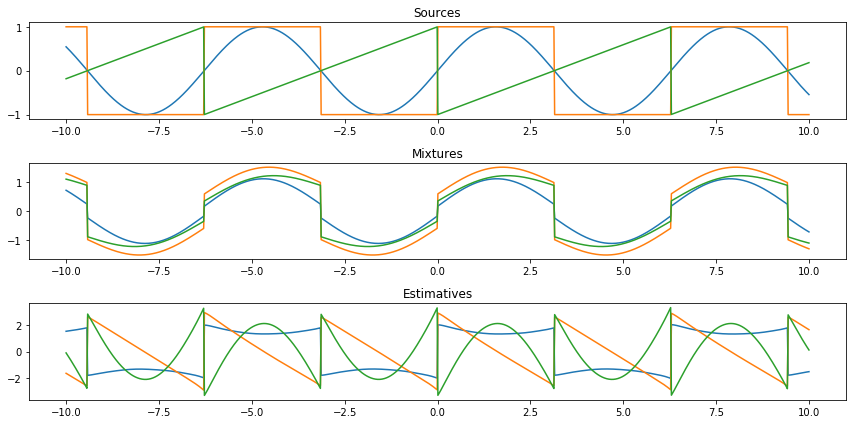

In [5]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

axes[0].plot(x, sources.T)
axes[0].set_title('Sources')
axes[1].plot(x, mixtures.T)
axes[1].set_title('Mixtures')
axes[2].plot(x, estimates.T)
axes[2].set_title('Estimatives')

fig.tight_layout()

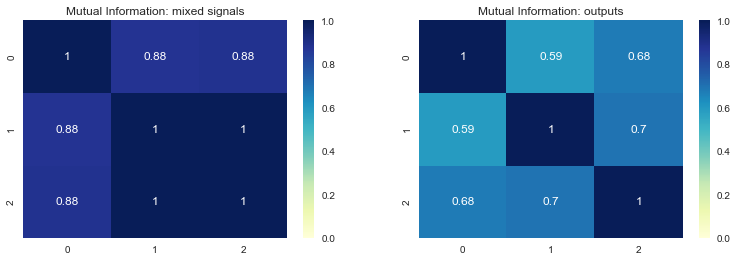

In [6]:
plot_MutualInformation(mixtures, estimates)

## Cichocki-Unbehauen Feedback

In [7]:
estimates, W = cichocki_Feedback(mixtures, learningRate = 1e-7, decayRate = 1e-8, runs= 2)

C:\Users\Pedro\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


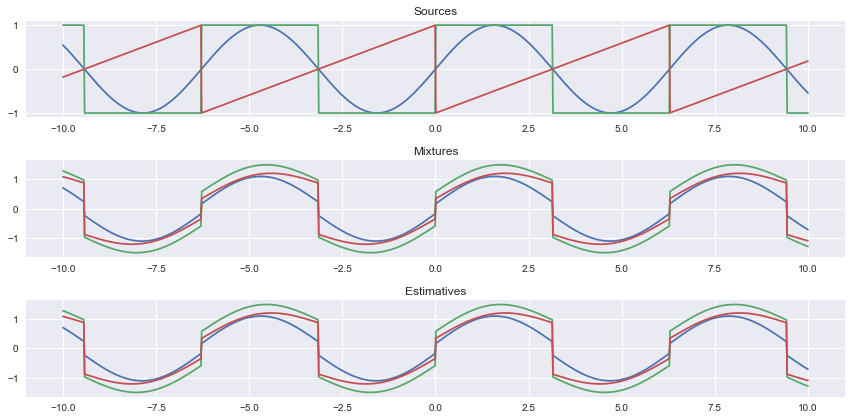

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

axes[0].plot(x, sources.T)
axes[0].set_title('Sources')
axes[1].plot(x, mixtures.T)
axes[1].set_title('Mixtures')
axes[2].plot(x, np.dot(W,mixtures).T)
axes[2].set_title('Estimatives')

fig.tight_layout()
fig.show()

plot_MutualInformation(mixtures, estimates)

## Cichocki-Unbehauen Feedforward

In [9]:
estimates, W = cichocki_Feedforward(mixtures, runs= 2, learningRate = 1e-6)

C:\Users\Pedro\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


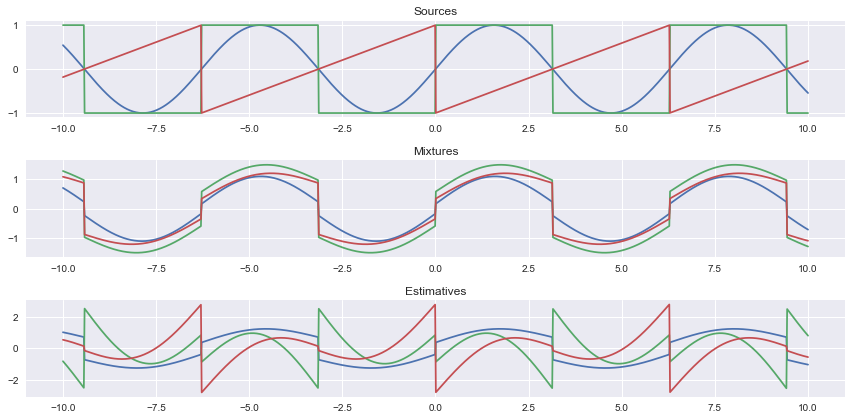

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

axes[0].plot(x, sources.T)
axes[0].set_title('Sources')
axes[1].plot(x, mixtures.T)
axes[1].set_title('Mixtures')
axes[2].plot(x, estimates.T)
axes[2].set_title('Estimatives')

fig.tight_layout()
fig.show()

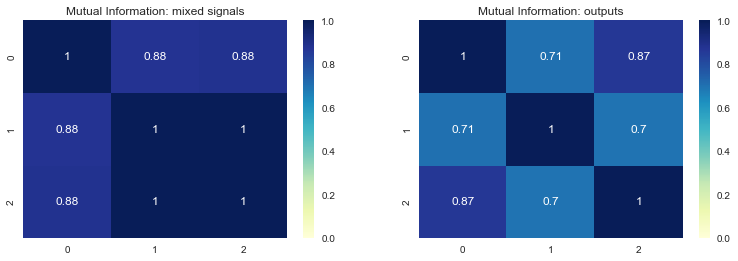

In [11]:
plot_MutualInformation(mixtures, estimates)